# Data Science Assignment - REUNION

## Project Description and Objective
A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

 - 0 = Low credit risk i.e high chance of paying back the loan amount

 - 1 = High credit risk i.e low chance of paying back the loan amount

# **Dataset Description**
    
The dataset has two files:
    
### applicant.csv : This file contains personal data about the (primary) applicant

- 1) Unique ID: `applicant_id` (string)
- 2) Other fields:
 - Primary_applicant_age_in_years (numeric)
 - Gender (string)
 - Marital_status (string)
 - Number_of_dependents (numeric)
 - Housing (string)
 - Years_at_current_residence (numeric)
 - Employment_status (string)
 - Has_been_employed_for_at_least (string)
 - Has_been_employed_for_at_most (string)
 - Telephone (string)
 - Foreign_worker (numeric)
 - Savings_account_balance (string)
 - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
 - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)
 
 
### `loan.csv`: This file contains data more specific to the loan application
- 1) Target: `high_risk_application` (numeric)
- 2) Other fields:
    - applicant_id (string)
    - Months_loan_taken_for (numeric)
    - Purpose (string)
    - Principal_loan_amount (numeric)
    - EMI_rate_in_percentage_of_disposable_income (numeric)
    - Property (string)
    - Has_coapplicant (numeric)
    - Has_guarantor (numeric)
    - Other_EMI_plans (string)
    - Number_of_existing_loans_at_this_bank (numeric)
    - Loan_history (string)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [355]:
!pip install numpy
!pip install pandas
!pip install matplotlib
# !pip install --upgrade warnings : warnings are inbuild we no need to install

# Import Library

In [143]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [95]:
applicant_data = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\Reunion\\data\\applicant.csv")
loan_data = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\Reunion\\data\\loan.csv")

In [96]:
applicant_data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [97]:
loan_data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [13]:
applicant_data['Primary_applicant_age_in_years'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [339]:
temp_list = applicant_data['Primary_applicant_age_in_years'].value_counts()

In [340]:
max(applicant_data['Primary_applicant_age_in_years'].value_counts())

51

In [14]:
len(applicant_data['Primary_applicant_age_in_years'].unique())

53

In [346]:
bins = applicant_data['Primary_applicant_age_in_years'].unique()

# 1. Do the Exploratory Data Analysis & share the insights.

###  1.1 Loan age wise plot

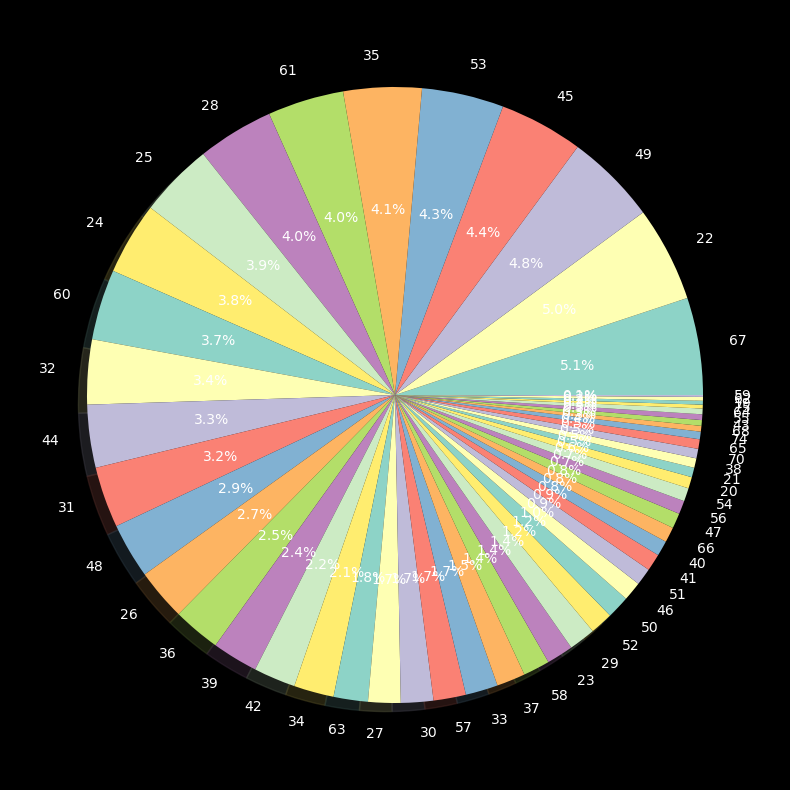

In [349]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.pie(temp_list, labels = bins, shadow = True, autopct = '%1.1f%%')
plt.show()

### Conclusion
We found that person have aged 67, 22 49, 45, 43 are more interested in taking loan.

In [101]:
loan_data['Purpose'].unique()

array(['electronic equipment', 'education', 'FF&E', 'new vehicle',
       'used vehicle', 'business', 'domestic appliances', 'repair costs',
       nan, 'career development'], dtype=object)

### 1.2 Insight taken out for Loan_Purpose with respect to Principle_loan_amount

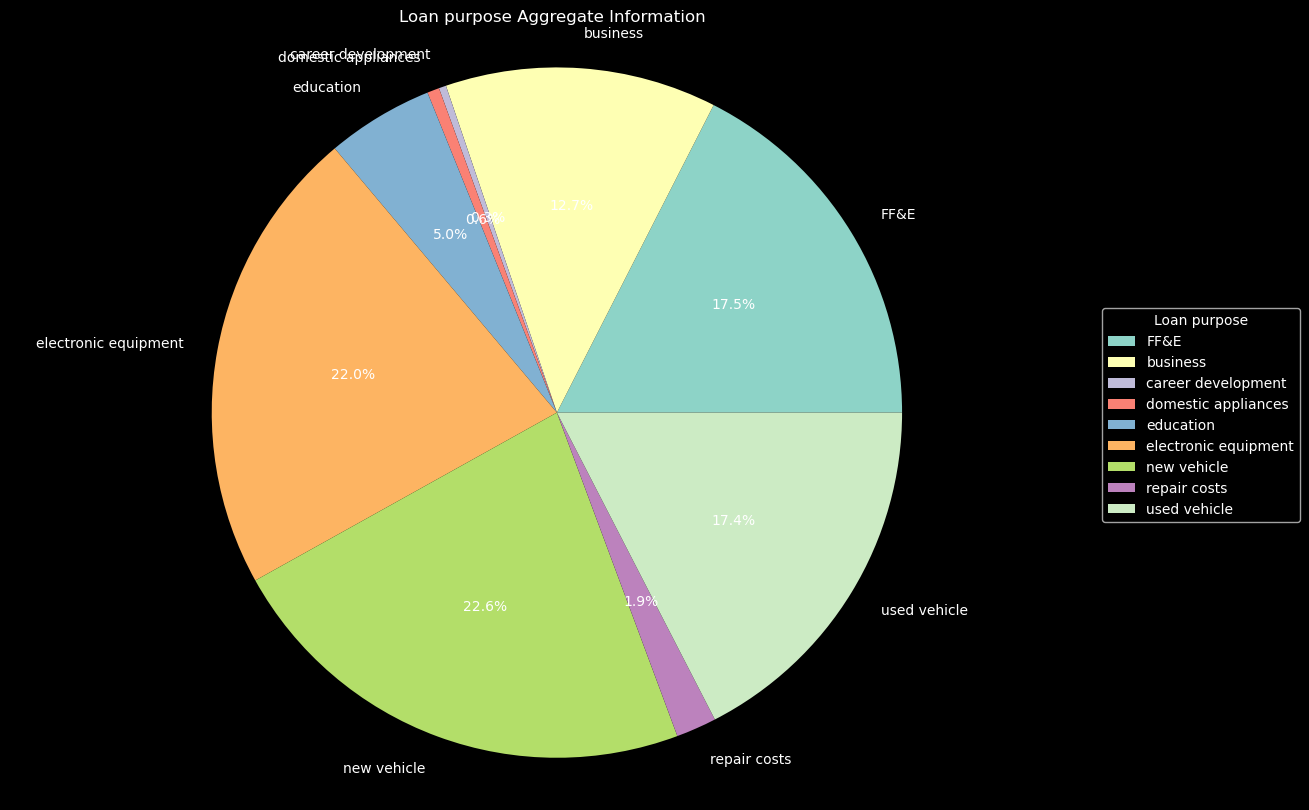

In [102]:
loans_purpose = loan_data.groupby(['Purpose'])['Principal_loan_amount'].sum().reset_index()
plt.figure(figsize=(14, 10))
plt.pie(loans_purpose["Principal_loan_amount"],labels=loans_purpose["Purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Aggregate Information')
plt.axis('equal')
plt.legend(title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Conclusion
we found that Majorly loan is taken for purpose of new vehichle, electornic equipment, used vehicle and FF&E purpose while on the other hand career development and domestic appliances having a low weightage for loan

# ----------------------------------------------------------------

### 1.3 Insights taken out on basis of Marital_status

In [98]:
applicant_data['Marital_status'].unique()

array(['single', 'divorced/separated/married', 'divorced/separated',
       'married/widowed'], dtype=object)

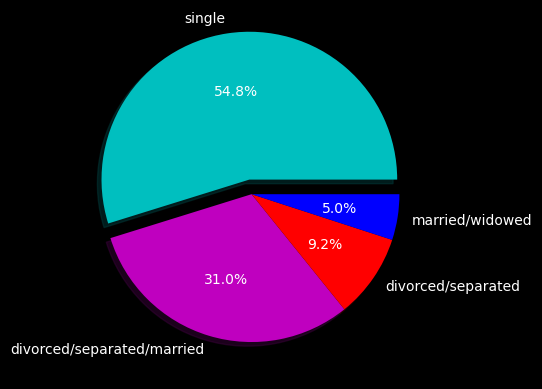

In [99]:
slices = applicant_data['Marital_status'].value_counts()
activity = applicant_data['Marital_status'].unique()

plt.pie(slices, labels = activity, colors = ['c', 'm', 'r','b'], shadow = True, autopct = '%1.1f%%', explode = (0.1,0,0,0))
plt.show()

### Conclusion
we found that Majorly person whose Marital status (single as well as divorced/separated/married) are more envolve in taken loan 

# ---------------------------------------------------------------------------------------------------------------

# Data Pre-Processing 
Data preprocessing is the strategy used to convert the rawdata into comprehensible collection of data. As the data obtained from the dataset have different forms of data it should be converted into a format that can be understood by the machine to perform further actions. In our dataset, there are 15 columns and 1000 Records in applicant_csv file and 11 columns and 1000 record are in loan_csv file. All these columns are not used in further processes.Hence,the dataset is processed to convert it into suitable format. First import all the required libraries. The libraries imported for this are pandas and numpy Then the dataset is imported in to a dataframe for data processing of our dataframe the following methods are used:

"info(), drop(), nunique(), unique(), replace(), isnull().sum(), dropna(), value_counts()"

In [318]:
# data merge
dataset = pd.merge(applicant_data, loan_data, on = "applicant_id")

In [319]:
dataset.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [320]:
dataset.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [321]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [322]:
dataset = dataset.drop(['applicant_id', 'loan_application_id', 'Telephone'], axis = 1)

In [323]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            938 non-null    object
 8   Has_been_employed_for_at_most

In [324]:
{column : list(dataset[column].unique()) for column in dataset.select_dtypes('object').columns}

{'Gender': ['male', 'female'],
 'Marital_status': ['single',
  'divorced/separated/married',
  'divorced/separated',
  'married/widowed'],
 'Housing': ['own', 'for free', 'rent'],
 'Employment_status': ['skilled employee / official',
  'unskilled - resident',
  'management / self-employed / highly qualified employee / officer',
  'unemployed / unskilled - non-resident'],
 'Has_been_employed_for_at_least': ['7 years',
  '1 year',
  '4 years',
  nan,
  '0 year'],
 'Has_been_employed_for_at_most': [nan,
  '4 years',
  '7 years',
  '0 year',
  '1 year'],
 'Savings_account_balance': [nan, 'Low', 'High', 'Very high', 'Medium'],
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)': [nan,
  '0',
  '2 lac'],
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)': ['0',
  '2 lac',
  nan],
 'Purpose': ['electronic equipment',
  'education',
  'FF&E',
  'new vehicle',
  'used vehicle',
  'business',
  'domestic appliances',
  'repair costs',
  nan,
  'career development'],
 'Property':

In [325]:
{column : len(dataset[column].unique()) for column in dataset.select_dtypes('object').columns}

{'Gender': 2,
 'Marital_status': 4,
 'Housing': 3,
 'Employment_status': 4,
 'Has_been_employed_for_at_least': 5,
 'Has_been_employed_for_at_most': 5,
 'Savings_account_balance': 5,
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)': 3,
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)': 3,
 'Purpose': 10,
 'Property': 4,
 'Other_EMI_plans': 3,
 'Loan_history': 5}

# Helper Function

### Binary_encode Function
binary_encode is used for segmentmented object value to 0 and 1 for example that we have column gender in which field are 'Male' and 'Female' then we can write it into binary 0 and 1 which is very useful for remove object variable column with replace to int which is easy for Machine learning algo to work.
### Original_encode  Function
original_encode help to segment object value which have more than two value are encoded with 0 , 1, 2, 3, so on. for example that we have column 'Savings_account_balance', ['none', 'Low', 'Medium', 'High', 'Very high'] Here it is in object data type we want ot convert it into int data type. for this we can give them indexing priority none - 0, low - 1 ....., very high - 4. this will help for generated useful data which is easily understood by Machine learning algo.
### Onehot_encode  Function
onehot_encode func help to segment object value which have very huge amount of value by makeing it reader possible with dummy values in form or matrix. for example we have column Housing': ['own', 'for free', 'rent'] we can't describe it on basis of original_encode and binary_encode. due to which we can assign a dummy variable 

   [['own' 0 0], [0 'for free' 0],[0 0 'rent']] as matrix [[1 0 0],[0 1 0],[0 0 1]]


In [326]:
def binary_encode(df, columns_with_positive_values):
    df = df.copy()
    for column, positive_value in columns_with_positive_values:
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [327]:
def ordinal_encode(df, columns_with_orderings):
    df = df.copy()
    for column, ordering in columns_with_orderings:
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [328]:
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

# **TASK-1**
### 2. How would you segment customers based on their risk (of default).
 we can segment customers like we have dataset in which many field are given we can segment custormer risk onn basis of 'Housing', 'Purpose', 'Years_at_current_residence', 'Employment_status', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Telephone', 'Foreign_worker', 'Savings_account_balance', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'loan_application_id', 'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor' etc.
### 3. Which of these segments / sub-segments would you propose be approved?
For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?

    - I had created new derived feature using existing derived column by using func binary encode, original_encode and onehot encode. Intitution behind this. when we have data which is very useful for model building but not in useable format then we have to create new feature using existing feature in integer format.
    - I can handle missing value as replace " " with "None" value.

I realise as I move along the analyse that categorical variables cause inconsistency to the plot and the model. And since our categorical variables donot vary much, for example, savings_account have 5 categories. I will transform categorical variables (including gender, Housing, Savings_account_balance, Purpose) into numerics.

  - Gender: male = 1, female = 2
  - Housing: own = 1, rent = 2, free = 3
  - Savings_account_balance: Not available = 0, litte = 1, moderate = 2, quite rich = 3, rich = 4
  - Purpose: car = 1, furniture/equipment = 2, radio/TV = 3, domestic appliances = 4, repairs = 5, education = 6, business = 7, vacation/others = 8

I had created function encoder's. which will fit_transform the categorical data into numeric values, however, I find it hard to have a control understanding on to which value they will convert what. So I will do it manually with pandas. I am also aware of pandas having this method 'get_dummies' to get one-hot encodings but I am not using it either.

In [329]:
def preprocess_input(df):
    df = df.copy()
    
     # drop column
    df = df.drop('Marital_status', axis = 1)
    
     # Encode missing values as 'none'
    for column in ['Savings_account_balance', 
                   'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
                   'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
                   'Has_been_employed_for_at_least',
                   'Has_been_employed_for_at_most', 'Other_EMI_plans', 'Property']:
        df[column] = df[column].fillna('none')
    
    # Binary encode the Sex and Risk columns
    df = binary_encode(
        df,
        columns_with_positive_values=[
            ('Gender', 'male')
        ]
    )
    
    # Ordinal encode the Saving accounts and Checking account columns
    df = ordinal_encode(
        df,
        columns_with_orderings=[
            ('Savings_account_balance', ['none', 'Low', 'Medium', 'High', 'Very high']),
            ('Balance_in_existing_bank_account_(upper_limit_of_bucket)', ['none','0','2 lac']),
            ('Balance_in_existing_bank_account_(lower_limit_of_bucket)', ['none','0','2 lac']),
            ('Has_been_employed_for_at_least', ['none','0 year','1 year','4 years', '7 years']),
            ('Has_been_employed_for_at_most', ['none','0 year','1 year','4 years', '7 years'])
        ]
    )
    
    # One-hot encode the Housing and Purpose columns
    df = onehot_encode(
        df,
        columns_with_prefixes=[
            ('Housing', 'H'),
            ('Purpose', 'P'),
            ('Other_EMI_plans', 'OTHR_EMI_PLANS'),
            ('Employment_status', 'EMP_STATUS'),
            ('Property', 'P'),
            ('Loan_history', 'LOAN_HIST')
        ]
    )
    
    return df

In [330]:
dataset = preprocess_input(dataset)

In [331]:
dataset.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),...,EMP_STATUS_unskilled - resident,P_building society savings agreement/life insurance,P_car or other,P_none,P_real estate,LOAN_HIST_all loans at this bank paid back duly,LOAN_HIST_critical/pending loans at other banks,LOAN_HIST_delay in paying off loans in the past,LOAN_HIST_existing loans paid back duly till now,LOAN_HIST_no loans taken/all loans paid back duly
0,67,1,1,4,4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,22,0,1,2,2,3,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
2,49,1,2,3,3,4,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,45,1,2,4,3,4,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,53,1,2,4,2,3,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [334]:
dataset.shape

(1000, 45)

# 4. Tell us what your observations were on the data itself (completeness, skews).
Uptil now i will observe some of the columns is not required for our aim. like martial status, application_id thus, we able to pre-process dataset and make it in usable form. Now next step is to train model using different Machine Learning algorithm's. It is given below that we pre-processed dataset and converted it into usable form.

In [335]:
dataset.isnull().sum()

Primary_applicant_age_in_years                                                 0
Gender                                                                         0
Number_of_dependents                                                           0
Years_at_current_residence                                                     0
Has_been_employed_for_at_least                                                 0
Has_been_employed_for_at_most                                                  0
Foreign_worker                                                                 0
Savings_account_balance                                                        0
Balance_in_existing_bank_account_(lower_limit_of_bucket)                       0
Balance_in_existing_bank_account_(upper_limit_of_bucket)                       0
Months_loan_taken_for                                                          0
Principal_loan_amount                                                          0
EMI_rate_in_percentage_of_di

In [351]:
dataset.to_csv(r'C:\Users\lenovo\OneDrive\Desktop\Reunion\Pre_processed_data\dataframe.csv', index=False, header=True)

# Conclusion
we had complited with the data pre-processing part and successfull save our pre-processed data in our appropriate location with name dataframe.csv Now we will use this pre-processed data in our task-2 where we will train our model using different machine learning algorithm.